# ⭐ What Is Model Tuning in Machine Learning?

Model tuning (a.k.a. hyperparameter tuning) is the process of finding the best hyperparameter settings so a machine-learning model performs optimally on unseen data.

---

## Key concepts

### 1. Parameters
- Learned from data during training.  
- Example: model weights in neural networks, coefficients in linear regression.

### 2. Hyperparameters
- Set before training and control how the model learns.  
- Examples: `learning_rate`, `num_trees`, `max_depth`, regularization strength.

> Model tuning = adjusting hyperparameters to improve performance on new data.

---

## 🔧 Why Tuning Matters

Without tuning:
- Underfitting — model too simple → poor performance.  
- Overfitting — model memorizes training data → poor generalization.  
- Training can be slow, unstable, or fail to converge.

With good tuning:
- Higher accuracy  
- More stable training and predictions  
- Better generalization to unseen data  
- Often faster to train

---

## Quick tips
- Tune using a validation set or cross-validation.  
- Start coarse (log scale) then refine.  
- Use random search or Bayesian optimization for many hyperparameters.


### 🧰 Common Hyperparameters to Tune
hr model ke pass kuch kuch parameter hote unko update krke accuracy check krna 
#### Decision Trees / Random Forests
- **max_depth** — maximum depth of each tree (controls complexity; keep small to avoid overfitting).  
- **min_samples_split** — minimum samples required to split an internal node (higher → smoother trees).  
- **n_estimators** — number of trees in the forest (more trees → lower variance, higher compute).

#### Neural Networks
- **learning_rate** — step size for optimizer (critical; try log-scale: 1e-4 → 1e-1).  
- **batch_size** — number of samples per gradient update (trade-off between stability and speed).  
- **num_layers** — number of hidden layers (controls model capacity).  
- **num_neurons** — units per layer (wider layers increase capacity).  
- **dropout_rate** — fraction of units dropped during training (regularization; 0.1–0.5 typical).

#### Gradient Boosting (e.g., XGBoost, LightGBM, CatBoost)
- **learning_rate** (eta) — shrinkage of each tree’s contribution (lower → more trees needed).  
- **n_estimators / num_boost_round** — number of boosting iterations.  
- **max_depth** — max tree depth per iteration (controls complexity).  
- **subsample / colsample_bytree** — row/feature sampling (helps regularization).

#### Support Vector Machines (SVMs)
- **C** — regularization parameter (large C → low bias, high variance).  
- **kernel** — kernel type (linear, rbf, poly — choose by data geometry).  
- **gamma** (for rbf/poly) — kernel coefficient (higher → tighter decision boundary).

Tips:
- Tune on a validation set or via cross-validation.
- Start with coarse grid/log scale then refine.
- Use randomized search or Bayesian optimization for many hyperparameters.


### 🔶 Simple Analogy #1 — Baking a Cake (Hyperparameters = Recipe Settings)

🧠 Key Idea

Tuning doesn’t change what the model learns, only how it learns.

**Analogy overview**
- Training a model = baking a cake  
- Ingredients = training data  
- Cake (taste/shape) = trained model  
- Recipe settings (oven temp, time, mixing speed) = hyperparameters

**What happens when settings are off**
- Oven temperature too high → burnt cake (overfitting or unstable training)  
- Mixing too slow → lumpy batter (poor optimization / undertraining)  
- Baking time too short → undercooked cake (underfitting)

**Tuning = adjusting recipe settings**
- Change hyperparameters until the model (cake) performs well on unseen data (tastes right)

**Practical tips**
- Validate changes using a hold-out set or cross-validation  
- Start coarse (large steps), then refine (smaller adjustments)  
- Change one setting at a time when possible to isolate effects  
- Log experiments (settings + metrics) to compare reliably

**Takeaway**
- Good hyperparameter tuning is like calibrating a recipe: small adjustments yield a big difference in the final result.

=================
=====================

# ⭐ What Is Cross-Validation?

Cross-validation (CV) estimates how well a model will perform on unseen data by repeatedly splitting the data into different train/test sets and averaging the results. It reduces overfitting risk and gives more reliable performance estimates than a single train/test split.

---

## 🔍 Why use cross-validation?
- Produces more stable and less biased performance estimates  
- Ensures model evaluation uses all data for training and testing (useful for small datasets)  
- Helps select models and tune hyperparameters reliably

---

## ⚙️ How k‑fold Cross‑Validation Works (step‑by‑step)
1. Choose k (e.g., k = 5).  
2. Split dataset into k equal folds: Fold 1, Fold 2, …, Fold k.  
3. For each i in 1..k:
  - Train on the other k − 1 folds  
  - Test on Fold i  
4. Compute the chosen metric for each fold.  
5. Average the k metrics → final CV score.

Example (k = 5)
- Cycles:
  - Cycle 1 → Train: Folds 2,3,4,5 | Test: Fold 1
  - Cycle 2 → Train: Folds 1,3,4,5 | Test: Fold 2
  - Cycle 3 → Train: Folds 1,2,4,5 | Test: Fold 3
  - Cycle 4 → Train: Folds 1,2,3,5 | Test: Fold 4
  - Cycle 5 → Train: Folds 1,2,3,4 | Test: Fold 5
- Example scores: 82%, 85%, 84%, 83%, 86%  
- Final score = (82 + 85 + 84 + 83 + 86) / 5 = 84%

---

## ✅ What cross-validation gives you
- More reliable performance estimate  
- Reduced variance vs. single split  
- Fair comparison between algorithms  
- Robust basis for hyperparameter tuning (GridSearchCV, RandomizedSearchCV, etc.)

---

## 🧰 Common uses
- Model evaluation  
- Hyperparameter selection  
- Algorithm comparison

---

## ✨ Best practices
- Use stratified folds for imbalanced classification  
- Prefer repeated CV or larger k for small datasets  
- Keep a separate hold-out test set if you perform model selection with CV  
- Shuffle data when appropriate

---

## ⚠️ Common pitfalls
- Data leakage (ensure preprocessing is fitted only on training folds)  
- Using CV results as final test performance without a hold-out test set  
- Not stratifying when classes are imbalanced

---


1️⃣ K-Fold Cross-Validation

Most common. Split into k folds and cycle through them.

Typical k values: 5 or 10

Good balance of computation vs reliability

where every part become once test data set 
and every part become training data  


Below is a **clear, complete, detailed explanation of all major methods of hyperparameter tuning**, including how they work, advantages, disadvantages, and when to use each.

---

# ⭐ **What Is Hyperparameter Tuning?**

Hyperparameters are settings you choose **before** training (e.g., learning rate, number of layers, number of trees).
Hyperparameter tuning means **searching for the best combination** of these settings to maximize model performance.

There are several methods—ranging from simple manual tuning to advanced probabilistic optimization.

---

# 🔶 **1. Manual Hyperparameter Tuning**

### **How it Works**

You pick hyperparameters based on:

* Experience
* Intuition
* Trial and error
* Observing training performance

### **Pros**

* Simple
* Good for small models
* Good initial exploration

### **Cons**

* Very slow
* Highly subjective
* Not systematic
* Doesn’t guarantee a good result

### **Use When**

* Small datasets
* Quick prototyping
* You understand your model very well

---

# 🔶 **2. Grid Search**

Grid Search tries **every possible combination** of hyperparameters from a predefined grid.

### Example

```python
param_grid = {
   'learning_rate': [0.1, 0.01, 0.001],
   'batch_size': [16, 32, 64]
}
```

Grid search will train **3 × 3 = 9** models.

### **Pros**

* Systematic
* Easy to understand
* Works well when search space is small

### **Cons**

* Explodes in large search spaces
* Very computationally expensive
* Many combinations are wasted (not promising)

### **Use When**

* Small hyperparameter space
* You want thorough exploration

---

# 🔶 **3. Random Search**

Random Search picks random combinations instead of exhaustive ones.

### Key Idea

Random search is often **faster and better** than grid search when only a few hyperparameters truly matter.

### **Pros**

* Much faster than grid search
* Covers a larger search space
* Good chance of finding near-optimal values

### **Cons**

* No guarantee of best result
* Still random → may miss small areas of interest

### **Use When**

* Medium/large search spaces
* Limited compute resources

---

# 🔶 **4. Bayesian Optimization**

This is a **smart** tuning method that learns which hyperparameters work better and focuses the search there.

### **How it Works (simplified):**

1. Try a few hyperparameter combinations
2. Build a probabilistic model of the search space (e.g., Gaussian Process)
3. Predict which hyperparameters are promising
4. Test them
5. Update the model and repeat

### **Pros**

* Much more efficient
* Finds good results with fewer trials
* Learns from past evaluations

### **Cons**

* More complex to implement
* Can be slower than random search in very large spaces

### **Use When**

* Hyperparameter tuning on expensive models (e.g., deep learning)
* You want optimal values quickly

Popular tools:

* **Hyperopt**
* **Optuna**
* **Scikit-Optimize (skopt)**

---

# 🔶 **5. Genetic Algorithms / Evolutionary Algorithms**

These mimic biological evolution.

### **How They Work:**

1. Create a population of random hyperparameter sets
2. Evaluate them
3. Select the best ones
4. Combine (“crossover”) and mutate them
5. Repeat over generations

### **Pros**

* Great for complex or weird search spaces
* Good for discrete & continuous parameters
* Finds high-quality solutions

### **Cons**

* Slow
* Requires many evaluations
* Harder to tune the algorithm itself

### **Use When**

* Very complex hyperparameter spaces
* Many interacting hyperparameters

---

# 🔶 **6. Early Stopping (Optimization Shortcut)**

Not exactly a search method, but **helps tuning** by stopping bad models early.

### How it Works

While training:

* If validation loss does not improve after X rounds → stop training

### Pros

* Saves computation
* Prevents overfitting

### Cons

* Needs a validation set
* Cannot tune hyperparameters alone

### Use When

* Neural networks
* Gradient boosting models

---

# 🔶 **7. Successive Halving / Hyperband (Advanced + Efficient)**

These are modern methods.

### **Idea**

* Try many hyperparameters with little training
* Keep the best ones
* Give them more resources
* Repeat

It’s like a tournament:
Lots of candidates → eliminate weak ones early → focus on strong ones.

### **Pros**

* Extremely efficient
* Great for deep learning
* Better than random/grid search for large spaces

### **Cons**

* More complex logic
* Needs good resource allocation strategy

### **Use When**

* You need speed
* Training is expensive
* Large hyperparameter search space

---

# 🔶 **8. Gradient-based Hyperparameter Optimization**

(for differentiable hyperparameters)

Some hyperparameters (like learning rate schedules) can be optimized using gradients.

### Pros

* Very fast
* Optimal for differentiable settings

### Cons

* Not widely applicable
* Hard to implement

Used in research and neural architecture search.

---

# 🔶 **9. Model-Based Optimization via Reinforcement Learning**

(Advanced / used in AutoML & NAS)

Used for:

* Neural Architecture Search (NAS)
* Automated hyperparameter pipelines

But expensive.

---

# 🌟 **Comparison Table (Easy Summary)**

| Method                | Speed      | Quality   | Complexity | Best For         |
| --------------------- | ---------- | --------- | ---------- | ---------------- |
| Manual                | Slow       | Low       | Low        | Small tasks      |
| Grid Search           | Very slow  | Medium    | Low        | Small grids      |
| Random Search         | Fast       | Good      | Low        | Medium spaces    |
| Bayesian Optimization | Fast       | Very good | Medium     | Expensive models |
| Genetic Algorithms    | Medium     | Very good | High       | Complex spaces   |
| Hyperband             | Very fast  | Very good | High       | Large spaces     |
| Early Stopping        | Saves time | —         | Low        | Deep learning    |
| RL / NAS              | Very slow  | Excellent | Very high  | Research         |

---

# 🎯 **Which Method Should You Use?**

* **Small dataset, small model → Grid Search or Random**
* **Medium dataset, normal ML → Random Search**
* **Large dataset, deep learning → Hyperband / Bayesian**
* **Complex interaction between parameters → Genetic algorithms**
* **Very expensive models → Bayesian Optimization**
* **When speed is critical → Hyperband**

---

# 🔶 **Analogy to Understand All Methods**

Imagine searching for the best restaurant in a new city:

| Method                | Analogy                                         |
| --------------------- | ----------------------------------------------- |
| Manual                | You pick random places based on mood            |
| Grid Search           | Visit every restaurant street-by-street         |
| Random Search         | Visit random restaurants throughout the city    |
| Bayesian Optimization | Ask locals → go to promising areas              |
| Genetic Algorithms    | Keep best restaurants → combine their traits    |
| Hyperband             | Try many places quickly → revisit the best ones |
| Early Stopping        | Leave early if food starts tasting bad          |

Bayesian and Hyperband are like using **smart strategies** rather than brute force.

---

If you'd like, I can also provide:

📌 Code examples (Sklearn / Optuna / Hyperopt / Keras)
📌 Visual diagrams of each approach
📌 A full comparison with real-world examples
📌 Hyperparameter tuning for specific algorithms (SVM, RF, XGBoost, NN)

Just tell me!


================
=============
=============

# 🌟 Ensemble Learning in Machine Learning (ML)

**Ensemble Learning** is a technique in machine learning where multiple models (called "base learners") are combined to produce a stronger, more accurate final model.

---

## 🧠 Main Idea

> A group of **weak learners**, when combined properly, can become a **strong learner**.

This is similar to how a group decision (e.g., opinions from many people) is often better than a single person's opinion.

---

## ✅ Why Use Ensemble Learning?

Ensemble methods improve:

| Benefit | Description |
|---------|-------------|
| ✔ **Accuracy** | By reducing errors of individual models |
| ✔ **Robustness** | Less sensitive to noise and variations in the data |
| ✔ **Generalization** | Better performance on unseen data |
| ✔ **Stability** | Reduces the chance of overfitting (depending on the method) |

---


===========
==========

isme bol skte   ki crowd ikattha krte model ka then last me result ko compare krte 

maximum vote ko consider krte hai  isme 

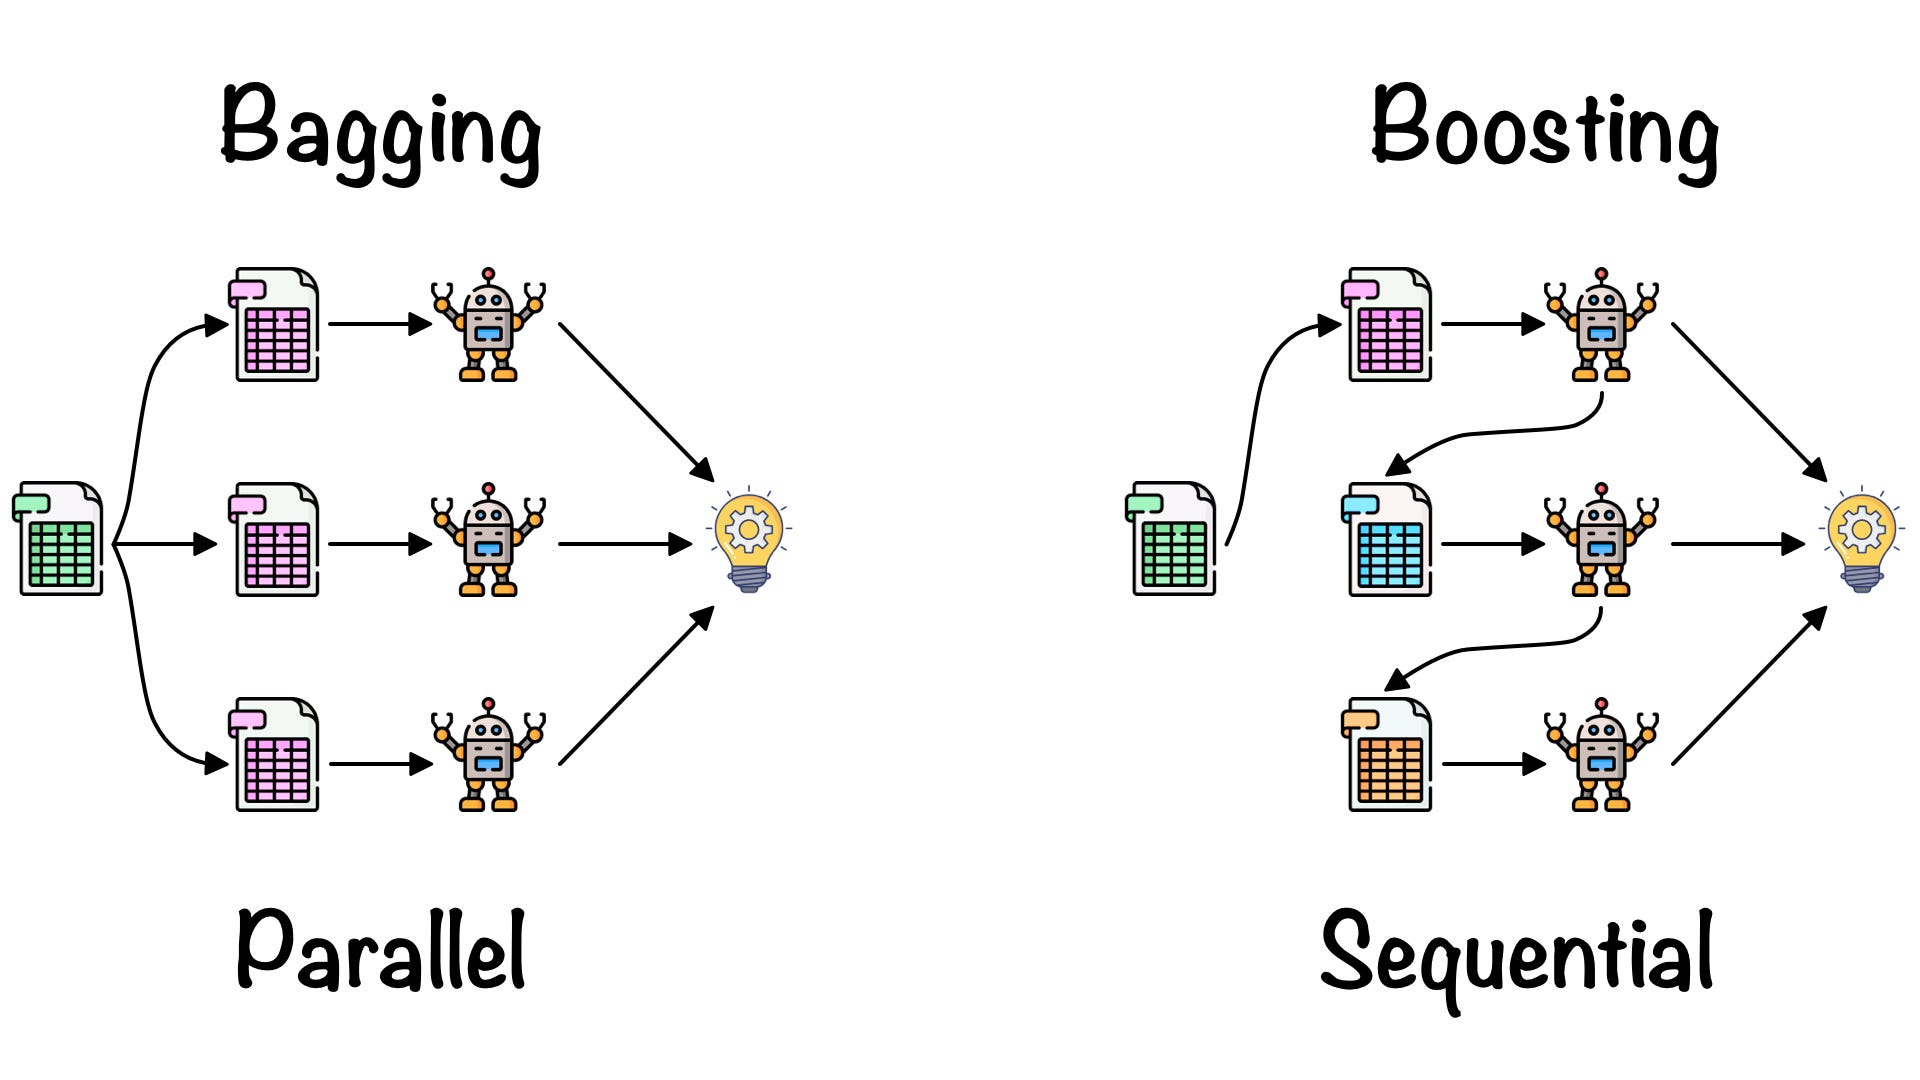

 =============
 ========

## 🔧 Types of Ensemble Learning Methods

There are three major types:

### 1️⃣ Bagging (Bootstrap Aggregating)

**Goal:** Reduce variance.

**How it works:**

1. Create multiple datasets by random sampling with replacement (bootstrapping)
2. Train a separate model on each dataset
3. Combine their predictions (majority vote or averaging)


**note** 
- same but diferent  
- jasie random forest tree : 
- yaha to bahut sare dessison tree to hote but 
- sb thode alg alg hote koi bda and chhota hota then usnko combination ko 
- Random forest kehte hai 


- Random forest me bahut saare secision tree hote 
- aur unme querry jata hai 
- aur jo maximum out vote hota querry ka wahi output hota 
---



#### 🔍 training process : 

- isme apn  bahut saare same model ko train krte hai 
- isme random data sets lete  
- suppose  SVM models hai 5 thok to saare me 1000 datasets dena hai to randomly 1000 choose krte
- isme ho skta 2 -3 models same data poitns ho 
- then yaha voting technique hota hai 
-> then final output  query ka maximum vote wala hota 

#### 🔍 Example: Random Forest

- Uses many decision trees trained on bootstrapped datasets
- Final prediction = majority vote (classification) or average (regression)

**Benefits:**
- Reduces overfitting
- Works well with decision trees



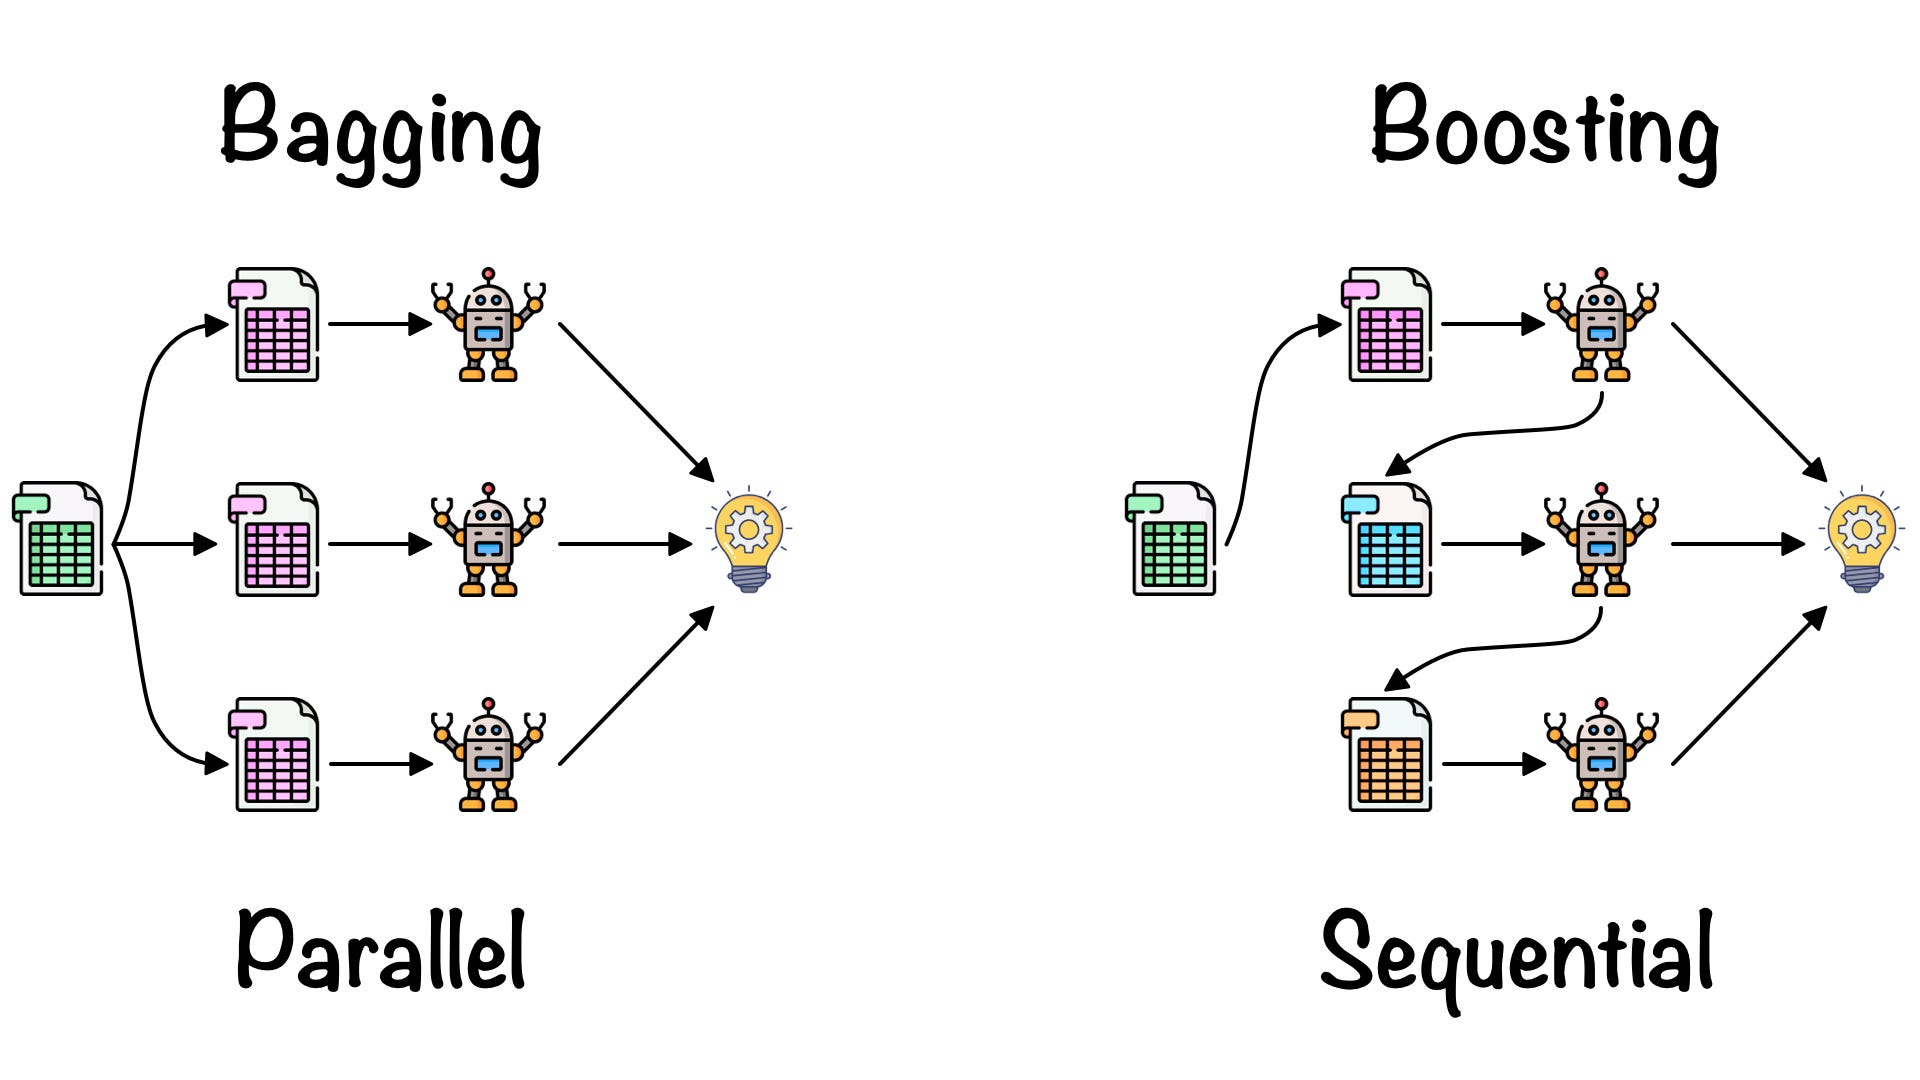

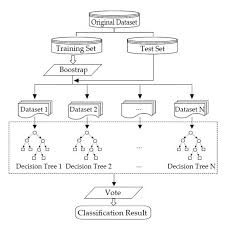

===========
===============

### 2️⃣ Boosting

**Goal:** Reduce bias.

**How it works:**

Boosting trains models **sequentially**, where each new model tries to fix the errors of the previous ones.

- isme ek mdoel train hota then jo jo mistake kiya rehta 
- us mistake ko next modle me train krta hai



![image-2.png](attachment:image-2.png)
---

#### 💡 Common Boosting Algorithms:

| Algorithm | Description |
|-----------|-------------|
| **AdaBoost** | Focuses on misclassified samples by giving them higher weights |
| **Gradient Boosting** | Uses gradient descent to minimize errors |
| **XGBoost / LightGBM / CatBoost** | Optimized versions of gradient boosting — fast, powerful, widely used in competitions and industry |

---

**Key idea:**

> Each new model learns from the mistakes of the previous model.

**Benefits:**
- Reduces bias
- Often achieves very high accuracy
- Works well on structured/tabular data

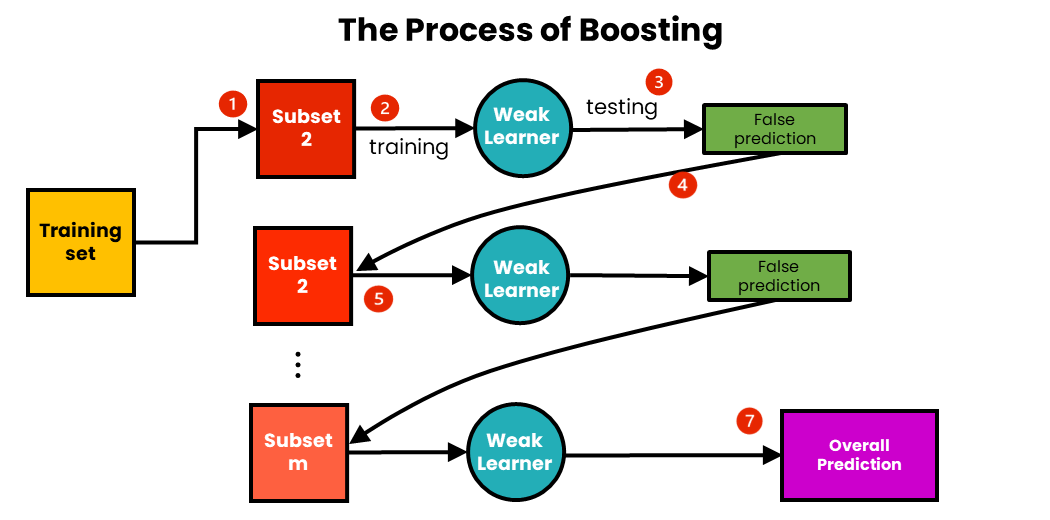

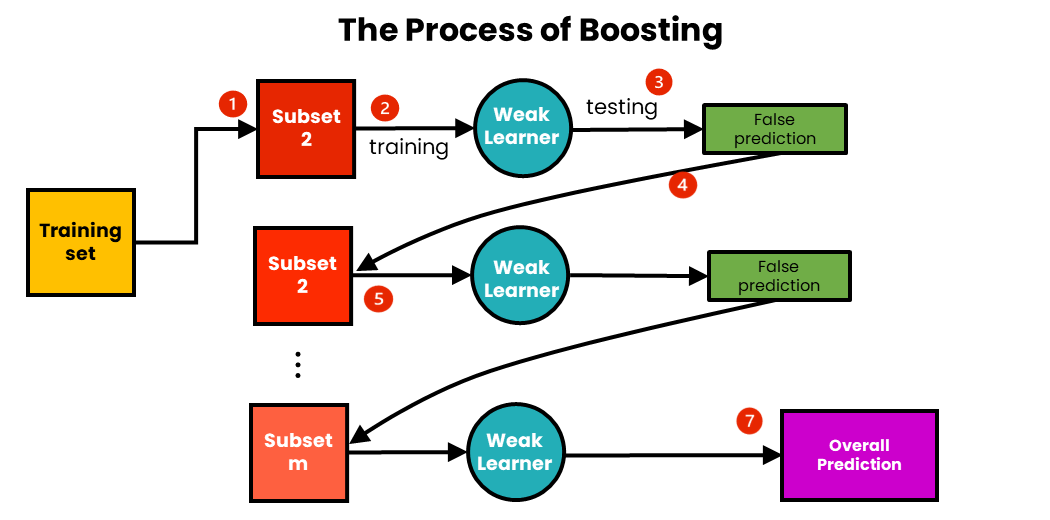

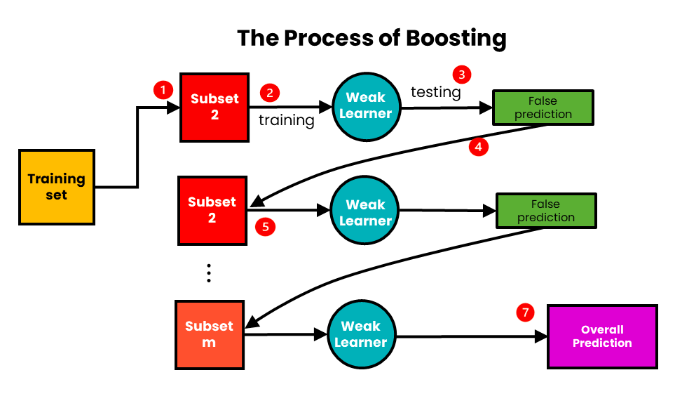

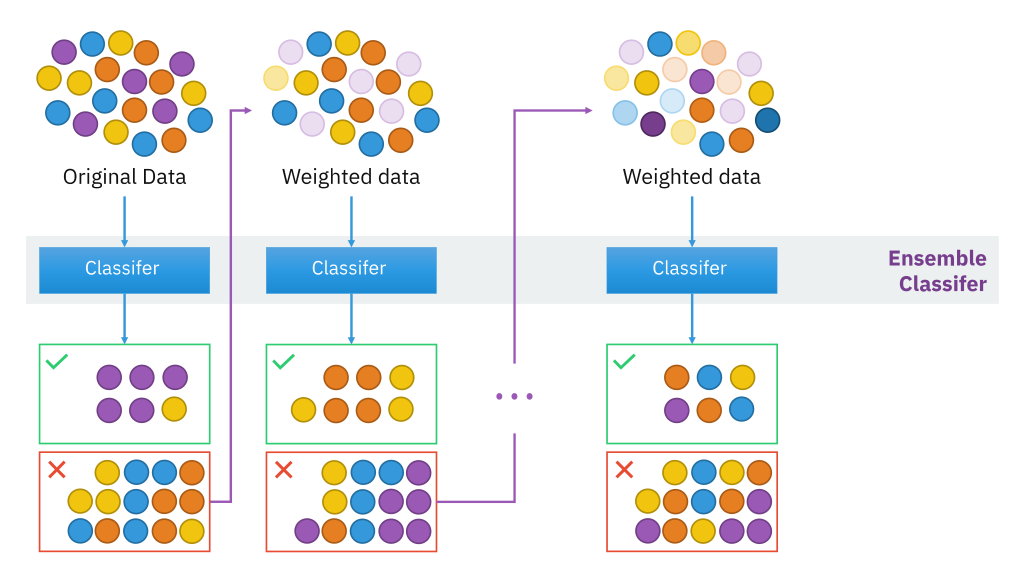

### 3️⃣ Stacking (Stacked Generalization)

**Goal:** Combine the strengths of different types of models.

**How it works:**

1. Train multiple base models (e.g., SVM, Decision Tree, Neural Network)
2. Use their predictions as input to another model (called **meta-learner**)
3. The meta-learner makes the final prediction

---

**Benefits:**
- Can achieve extremely high performance
- Very flexible because models of different types can be combined

**working**
- suppose model  train hua 
- then  querry lete as a input 
- learner model dekhta ki kon sa model jyada prediction kiya 
- then uske according weightage deta 
- suppose model A , B , C hai jissme model C B A  
- ye order hai achha perform krne ka 
- ab learner is order me importance dega 



## Stacking models 

- suppsoe we have 1000 data points 
-  models :  SVM , LR , DT  [ ye saare Base Model hai ]
- iske model ke pridiciton se meta mdoels bnta 
- suppose meta model [ KNN ] hai 
- ab base model ke prediciton ko KNN model use krta hai 

### agr isme cross fold validation use kre to 
- Base model cross fold val se train hoga to 200 , 200 ,200 ,200 ,200 krke train hoga 
- aur meta learner me 200 , 200 krke 1000 data set outcome ajayega 
- then ab ye 1000 data sets  ko   KNN me train krte hai 
- ab ye meta learner train hoga
- then yahi meta leaner ka prediction or trained model use hoga 

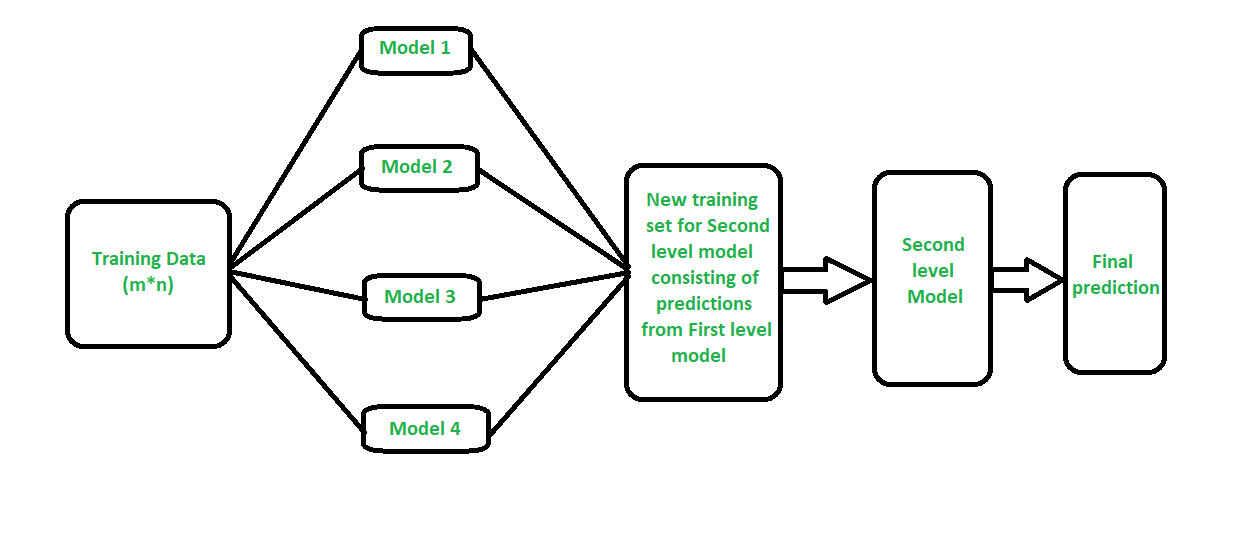

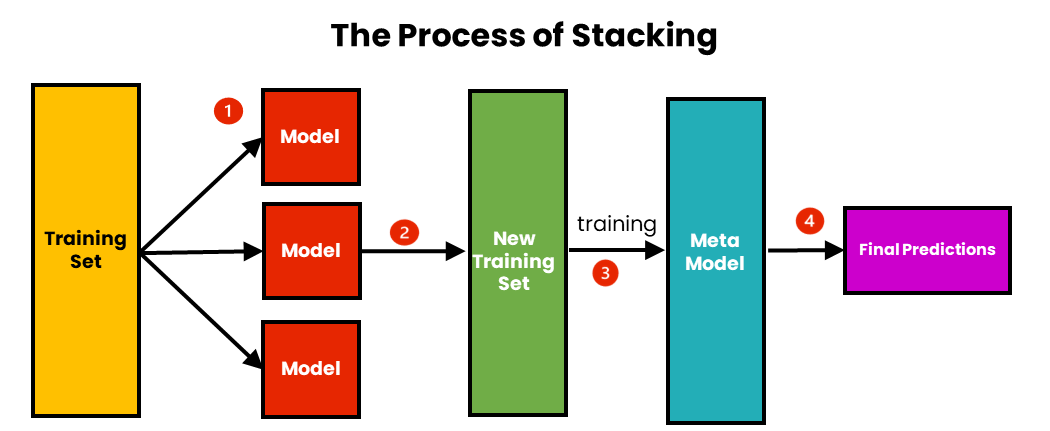

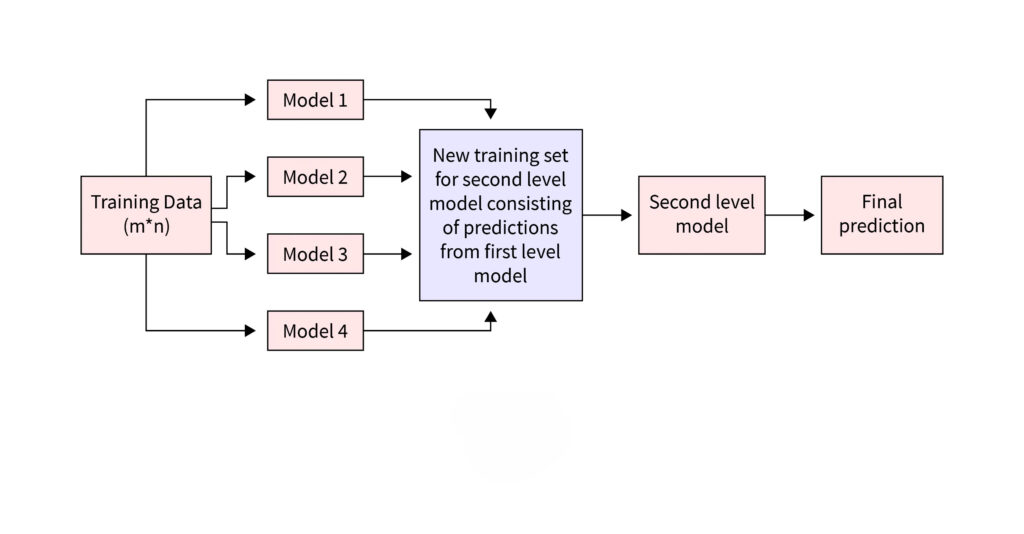

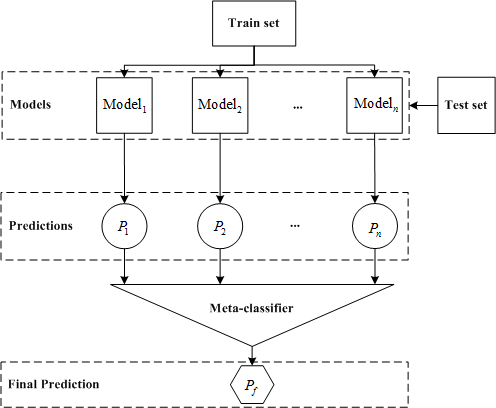

## note :

- *jb model train kre  aur wo overfiting kre  means accuracy 100 aa rhi*
- to apn bagging krte  jisse Generalise model bn jata 

- agr jb model High varience , high bias de tb underfiting ka condition hota 
- tb hum boosting krte  Generalize model bnane ke liye 

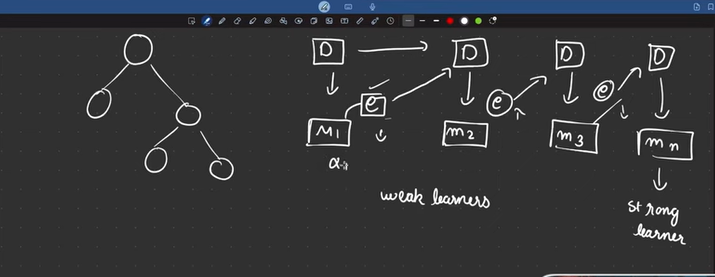

yaha dekh skte output ke sath error bhi bhej rha taaki usko fix kr ske 

|

### Boosting Technique 

- Ada boost [old ]
- Gradient Bossting 
- XG Boost 